In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import IPython.display as ipd

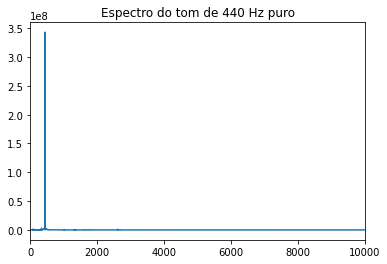

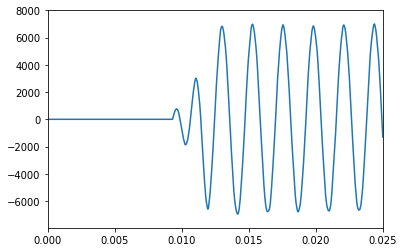

In [ ]:
#Análise da resposta do sistema de microfone do computador
from scipy.io import wavfile

fs, tom_puro = wavfile.read('Tom-puro.wav')

tom_puro = tom_puro[:100000] #Limitando o número de amostras
tom_puro = tom_puro[:,0] #Selecionando apenas um canal de áudio
N = len(tom_puro)

fft_puro = np.fft.fft(tom_puro)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_puro)[0:int(N/2)])
plt.title('Espectro do tom de 440 Hz puro')
plt.xlim(0,10000)

plt.figure()
plt.xlim(0,0.025)
t = np.arange(N)/fs
plt.plot(t,tom_puro)

ipd.Audio(tom_puro,rate=fs)

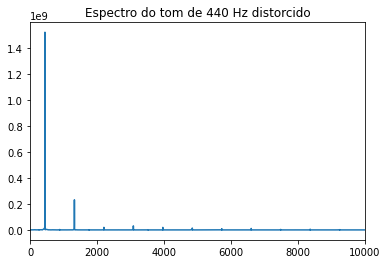

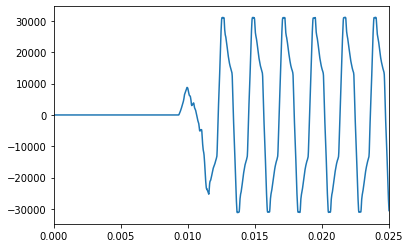

In [ ]:
#Análise da resposta do sistema de microfone do computador com saturação
fs, distorcido = wavfile.read('Distorcido.wav')

distorcido = distorcido[:100000] #Limitando o número de amostras
distorcido = distorcido[:,0] #Selecionando apenas um canal de áudio
N = len(distorcido)

fft_distorcido = np.fft.fft(distorcido)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_distorcido)[0:int(N/2)])
plt.title('Espectro do tom de 440 Hz distorcido')
plt.xlim(0,10000)

plt.figure()
plt.xlim(0,0.025)
t = np.arange(N)/fs
plt.plot(t,distorcido)

ipd.Audio(distorcido, rate=fs)

Text(0.5, 1.0, 'Senoide 60 Hz')

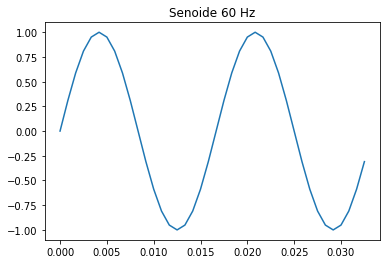

In [ ]:
fs=1200
length=1
t=np.arange(0,length,1/fs)
fm=60
senoide=np.sin(2*np.pi*t*fm)
plt.plot(t[0:2*int(fs/fm)],senoide[0:2*int(fs/fm)])
plt.title('Senoide 60 Hz')


Text(0.5, 1.0, 'Espectro da Senoide 60 Hz')

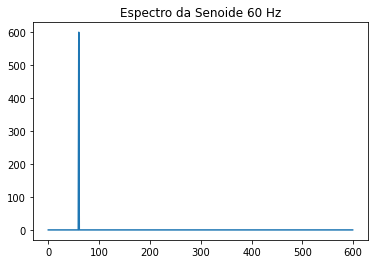

In [ ]:
N=len(t)
fft_senoide=np.fft.fft(senoide)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_senoide)[0:int(N/2)])
plt.title('Espectro da Senoide 60 Hz')

Text(0.5, 1.0, 'Onda quadrada do retificador de meia onda')

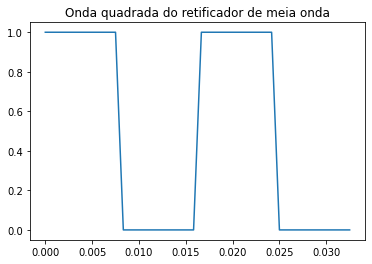

In [ ]:
square_block=np.append(np.ones(int(fs/(2*fm))),np.zeros(int(fs/(2*fm))))
square=np.tile(square_block,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square[0:2*int(fs/fm)])
plt.title('Onda quadrada do retificador de meia onda')



Text(0.5, 1.0, 'Espectro da onda quadrada')

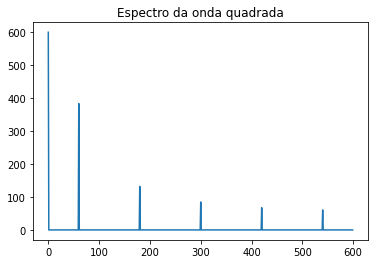

In [ ]:
N=len(t)
fft_square=np.fft.fft(square)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_square)[0:int(N/2)])
plt.title('Espectro da onda quadrada')

Text(0.5, 1.0, 'Onda quadrada do retificador de onda completa')

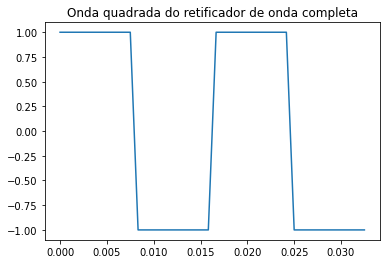

In [ ]:
square2_block=np.append(np.ones(int(fs/(2*fm))),-np.ones(int(fs/(2*fm))))
square2=np.tile(square2_block,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square2[0:2*int(fs/fm)])
plt.title('Onda quadrada do retificador de onda completa')


Text(0.5, 1.0, 'Espectro da onda quadrada')

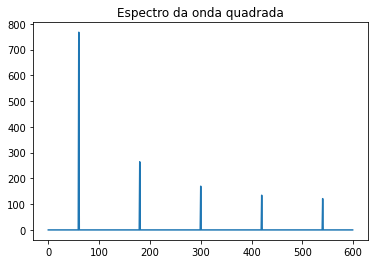

In [ ]:
N=len(t)
fft_square2=np.fft.fft(square2)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_square2)[0:int(N/2)])
plt.title('Espectro da onda quadrada')

Text(0.5, 1.0, 'Espectro da onda retificada')

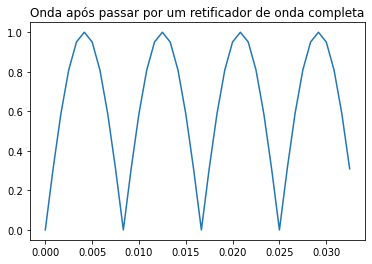

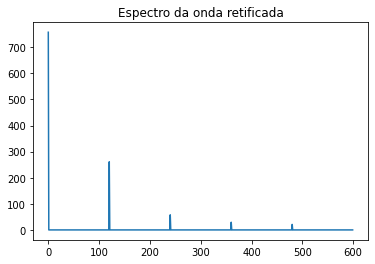

In [ ]:
ret_completo=np.multiply(senoide,square2)
plt.plot(t[0:2*int(fs/fm)],ret_completo[0:2*int(fs/fm)])
plt.title('Onda após passar por um retificador de onda completa')

plt.figure()
fft_ret_completo=np.fft.fft(ret_completo)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_ret_completo)[0:int(N/2)])
plt.title('Espectro da onda retificada')

Text(0.5, 1.0, 'Espectro de Fourier da onda controlada')

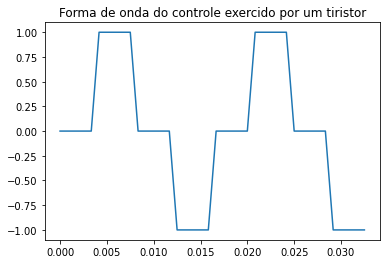

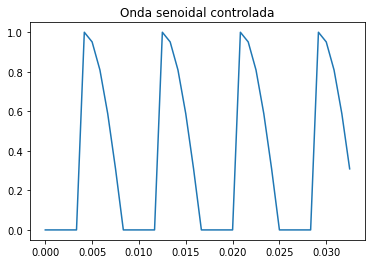

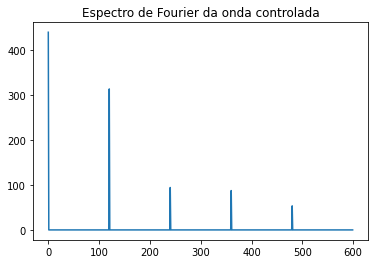

In [ ]:
square_block_tir=np.append(np.zeros(int(fs/(4*fm))),np.ones(int(fs/(4*fm))))
square_block_tir=np.append(square_block_tir,-square_block_tir)
square_tir=np.tile(square_block_tir,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square_tir[0:2*int(fs/fm)])
plt.title('Forma de onda do controle exercido por um tiristor')

ret_tir=np.multiply(senoide,square_tir)
plt.figure()
plt.plot(t[0:2*int(fs/fm)],ret_tir[0:2*int(fs/fm)])
plt.title('Onda senoidal controlada')

plt.figure()
fft_ret_tir=np.fft.fft(ret_tir)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_ret_tir)[0:int(N/2)])
plt.title('Espectro de Fourier da onda controlada')